In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')
import pickle



Column Names

id - Unique ID for each home sold

date - Date of the home sale

price - Price of each home sold

bedrooms - Number of bedrooms

bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower

sqft_living - Square footage of the apartment interior living space

sqft_lot - Square footage of the land space

floors - Number of floors

waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not

view - An index from 0 to 4 of how good the view of the property was

condition - An index from 1 to 5 on the condition of the apartment,

grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high-quality level of construction and design.

sqft_above - The square footage of the interior housing space that is above ground level

sqft_basement - The square footage of the interior housing space that is below ground level

yr_built - The year the house was initially built

yr_renovated - The year of the house’s last renovation

zipcode - What zipcode area the house is in

lat - Lattitude

long - Longitude

sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors

sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

In [32]:
df = pd.read_csv('../Dataset/kc/kc_final.csv')
df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [33]:
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [34]:
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [35]:
df['sqft_basement'] = np.ceil(df['sqft_basement'].apply(lambda x: float(x/1000)))

In [36]:
# convert df['sqft_basement'] to int
df['sqft_basement'] = df['sqft_basement'].astype(int)

In [37]:
df['sqft_basement'].unique()

array([0, 1, 2, 3, 4, 5])

In [38]:
df['yr_renovate_to_now'] = df['yr_renovated']
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_renovate_to_now
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,0
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,2170,1,1951,1991,98125,47.7210,-122.319,1690,7639,1991
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,0
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,1050,1,1965,0,98136,47.5208,-122.393,1360,5000,0
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,0


In [74]:
df.iloc[0]

id                    7129300520
date                  2014-10-13
price                     221900
bedrooms                       3
bathrooms                      1
sqft_living                 1180
sqft_lot                    5650
floors                         1
waterfront                     0
view                           0
condition                      3
grade                          7
sqft_above                  1180
sqft_basement                  0
yr_built                    1955
yr_renovated                   0
zipcode                    98178
lat                      47.5112
long                    -122.257
sqft_living15               1340
sqft_lot15                  5650
yr_renovate_to_now             0
month                         10
year                        2014
Name: 0, dtype: object

In [39]:
df['floors'] = df['floors'].astype(int)
df['bathrooms'] = df['bathrooms'].astype(int)
df['price'] = df['price'].astype(int)

dibagi per 20 tahun

In [40]:
df['yr_renovate_to_now'] = df['yr_renovate_to_now'].apply(lambda x: 2024-x if x!=0 else 0)
df['yr_renovate_to_now'].unique()

array([ 0, 33, 22, 14, 25, 32, 11, 30, 46, 19, 16, 21, 40, 70, 10, 13, 50,
       41, 79, 34, 36, 67, 47, 43, 29, 24, 26, 54, 35, 20, 38, 15, 17, 37,
       51, 18, 39, 23, 44, 53, 45, 27, 74, 55, 76,  9, 56, 12, 61, 73, 31,
       62, 28, 52, 71, 69, 42, 68, 84, 48, 78, 49, 66, 60, 65, 64, 57, 59,
       90, 80], dtype=int64)

In [41]:
df['yr_renovate_to_now'] = df['yr_renovate_to_now'].apply(lambda x: (int(x//20)+1) if x!=0 else 0)

In [42]:
df['yr_renovate_to_now'].value_counts()

yr_renovate_to_now
0    20699
2      409
1      320
3      138
4       43
5        4
Name: count, dtype: int64

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  21613 non-null  int64  
 1   date                21613 non-null  object 
 2   price               21613 non-null  int32  
 3   bedrooms            21613 non-null  int64  
 4   bathrooms           21613 non-null  int32  
 5   sqft_living         21613 non-null  int64  
 6   sqft_lot            21613 non-null  int64  
 7   floors              21613 non-null  int32  
 8   waterfront          21613 non-null  int64  
 9   view                21613 non-null  int64  
 10  condition           21613 non-null  int64  
 11  grade               21613 non-null  int64  
 12  sqft_above          21613 non-null  int64  
 13  sqft_basement       21613 non-null  int32  
 14  yr_built            21613 non-null  int64  
 15  yr_renovated        21613 non-null  int64  
 16  zipc

### Split the date into month and year
Feature Extraction

In [44]:
df['month'] = df['date'].apply(lambda x: int(x.split('T')[0].split('-')[1]))
df['year'] = df['date'].apply(lambda x: int(x.split('T')[0].split('-')[0]))

### Buang outlier

<Axes: xlabel='price', ylabel='Count'>

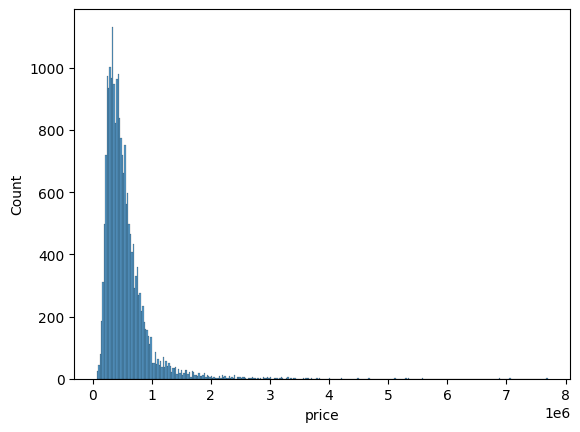

In [45]:
sns.histplot(df['price'])

In [46]:
print(df['condition'][0])

3


In [47]:
df.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_renovate_to_now,month,year
0,7129300520,2014-10-13,221900,3,1,1180,5650,1,0,0,...,1955,0,98178,47.5112,-122.257,1340,5650,0,10,2014
1,6414100192,2014-12-09,538000,3,2,2570,7242,2,0,0,...,1951,1991,98125,47.7210,-122.319,1690,7639,2,12,2014
2,5631500400,2015-02-25,180000,2,1,770,10000,1,0,0,...,1933,0,98028,47.7379,-122.233,2720,8062,0,2,2015
3,2487200875,2014-12-09,604000,4,3,1960,5000,1,0,0,...,1965,0,98136,47.5208,-122.393,1360,5000,0,12,2014
4,1954400510,2015-02-18,510000,3,2,1680,8080,1,0,0,...,1987,0,98074,47.6168,-122.045,1800,7503,0,2,2015
5,7237550310,2014-05-12,1225000,4,4,5420,101930,1,0,0,...,2001,0,98053,47.6561,-122.005,4760,101930,0,5,2014
6,1321400060,2014-06-27,257500,3,2,1715,6819,2,0,0,...,1995,0,98003,47.3097,-122.327,2238,6819,0,6,2014
7,2008000270,2015-01-15,291850,3,1,1060,9711,1,0,0,...,1963,0,98198,47.4095,-122.315,1650,9711,0,1,2015
8,2414600126,2015-04-15,229500,3,1,1780,7470,1,0,0,...,1960,0,98146,47.5123,-122.337,1780,8113,0,4,2015
9,3793500160,2015-03-12,323000,3,2,1890,6560,2,0,0,...,2003,0,98038,47.3684,-122.031,2390,7570,0,3,2015


In [48]:
#Remove outlier method 1 (quantile method)
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

threshold = 1.5

#Outliernya disini
outliers = df[(df['price'] < Q1 - threshold * IQR) | (df['price'] > Q3 + threshold * IQR)]
print(outliers.shape, df.shape)
print(outliers.index)

#Ini baru ngapus dari datanya, ini yang gua pake sih, kalo kalian pengen input yg sama
df.drop(outliers.index, inplace=True)
print(df.shape)


(1146, 24) (21613, 24)
Index([    5,    21,    49,    69,   125,   153,   216,   246,   269,   270,
       ...
       21525, 21530, 21532, 21540, 21551, 21568, 21576, 21590, 21597, 21600],
      dtype='int64', length=1146)
(20467, 24)


In [49]:
df['price'].std()

208371.26167027562

In [50]:
df['price'].mean()

476984.55943714274

<Axes: xlabel='price', ylabel='Count'>

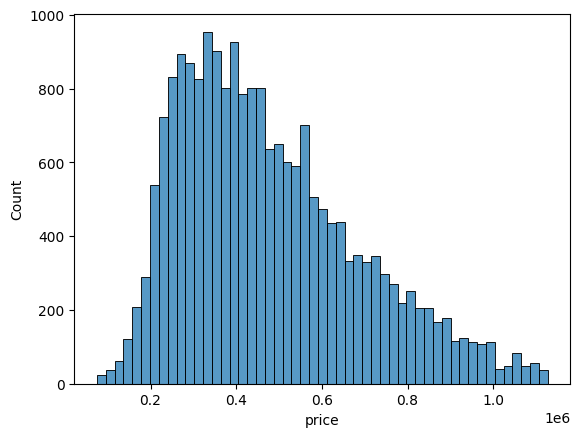

In [51]:
sns.histplot(df['price'])

## Split numerical data and ordinal data

In [52]:
# Inisiasi permisahan
numerical_data = df[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_above', 'yr_built','sqft_living15','sqft_lot15','month','year']]
ordinal_data = df[['view','condition', 'grade', 'sqft_basement', 'yr_renovated','waterfront']]
geospatial_data = df[['lat', 'long','zipcode']] #Consider this as numerical data

# waterfront dijadikan ordinal dengan asumsi karena hanya 2 data. 0 = tidak ada waterfront, 1 = ada waterfront

label = df['price'] # Target

### Standarisasi data

In [53]:
# # Tanpa geodata
# data = pd.concat([numerical_data, ordinal_data, label], axis=1)
# data.head()
# # data.head()

# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# data_scaled = scaler.fit_transform(data)

# data_scaled = pd.DataFrame(data_scaled, columns=data.columns)
# data_scaled.head()

In [76]:
# dengan geo data
data = pd.concat([numerical_data, ordinal_data, geospatial_data, label], axis=1)
data.head()

from sklearn.preprocessing import StandardScaler
import pickle

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

data_scaled = pd.DataFrame(data_scaled, columns=data.columns)

# Dump the scaler object using pickle
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

data_scaled.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,sqft_living15,sqft_lot15,month,...,view,condition,grade,sqft_basement,yr_renovated,waterfront,lat,long,zipcode,price
0,-0.361227,-1.026447,-1.026772,-0.223404,-0.780290,-0.726449,-0.542219,-0.946884,-0.256127,1.097518,...,-0.269401,-0.627864,-0.510564,-0.718622,-0.197177,-0.054675,-0.323949,-0.307106,1.864498,-1.224213
1,-0.361227,0.465089,0.767205,-0.183712,1.040713,0.634790,-0.679394,-0.377702,-0.181178,1.739068,...,-0.269401,-0.627864,-0.510564,0.870577,5.059556,-0.054675,1.163625,-0.742472,0.870791,0.292828
2,-1.456682,-1.026447,-1.555931,-0.114948,-0.780290,-1.290195,-1.296682,1.297321,-0.165238,-1.468681,...,-0.269401,-0.627864,-1.472874,-0.718622,-0.197177,-0.054675,1.283453,-0.138577,-0.947880,-1.425301
3,0.734229,1.956626,-0.020080,-0.239610,-0.780290,-0.905198,-0.199281,-0.914360,-0.280620,1.739068,...,-0.269401,2.462312,-0.510564,0.870577,-0.197177,-0.054675,-0.255881,-1.262102,1.077032,0.609578
4,-0.361227,0.465089,-0.381457,-0.162818,-0.780290,-0.038955,0.555181,-0.198816,-0.186302,-1.468681,...,-0.269401,-0.627864,0.451745,-0.718622,-0.197177,-0.054675,0.424801,1.181565,-0.085417,0.158449


In [55]:
data_scaled.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'sqft_above', 'yr_built', 'sqft_living15', 'sqft_lot15', 'month',
       'year', 'view', 'condition', 'grade', 'sqft_basement', 'yr_renovated',
       'waterfront', 'lat', 'long', 'zipcode', 'price'],
      dtype='object')

ni harusnya dua ini diapus

In [56]:
features = ['sqft_living','grade','sqft_living15','sqft_above','lat','bathrooms','bedrooms','floors','view','sqft_basement','sqft_lot','sqft_lot15','yr_renovated','long']

In [57]:
# Save mean dan standard deviation dari setiap feature
saved_mean = []
saved_std = []


for column in data_scaled[features].columns :
    saved_mean.append(df[column].mean())
    saved_std.append(df[column].std())

print(saved_mean)
print(saved_std)

[1975.5581668051009, 7.530561391508281, 1922.2551912835295, 1708.3309718082767, 47.55688812234329, 1.6881809742512337, 3.329750329799189, 1.4284946499242683, 0.17266819758635854, 0.45219133238872333, 14610.408169248058, 12447.084526310646, 74.68114525822055, -122.2132654028436]
[774.8334603691661, 1.0391917852731496, 614.9320098425608, 727.2964609354087, 0.14103849190104215, 0.6704659761079718, 0.9128847124369232, 0.5491614709044589, 0.6409504521819265, 0.6292633043508314, 40109.55681337646, 26538.59224971217, 378.76164705607835, 0.1424124032485596]


In [77]:
# dengan geo data
data = df[features]
data.head()

from sklearn.preprocessing import StandardScaler
import pickle

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

data_scaled = pd.DataFrame(data_scaled, columns=data.columns)

# Dump the scaler object using pickle
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

data_scaled.head()

,sqft_living,grade,sqft_living15,sqft_above,lat,bathrooms,bedrooms,floors,view,sqft_basement,sqft_lot,sqft_lot15,yr_renovated,long
0,-1.026772,-0.510564,-0.946884,-0.726449,-0.323949,-1.026447,-0.361227,-0.780290,-0.269401,-0.718622,-0.223404,-0.256127,-0.197177,-0.307106
1,0.767205,-0.510564,-0.377702,0.634790,1.163625,0.465089,-0.361227,1.040713,-0.269401,0.870577,-0.183712,-0.181178,5.059556,-0.742472
2,-1.555931,-1.472874,1.297321,-1.290195,1.283453,-1.026447,-1.456682,-0.780290,-0.269401,-0.718622,-0.114948,-0.165238,-0.197177,-0.138577
3,-0.020080,-0.510564,-0.914360,-0.905198,-0.255881,1.956626,0.734229,-0.780290,-0.269401,0.870577,-0.239610,-0.280620,-0.197177,-1.262102
4,-0.381457,0.451745,-0.198816,-0.038955,0.424801,0.465089,-0.361227,-0.780290,-0.269401,-0.718622,-0.162818,-0.186302,-0.197177,1.181565


## Look for the data Correlation

In [58]:
data1 = pd.concat([numerical_data, geospatial_data, label], axis=1)

<Axes: >

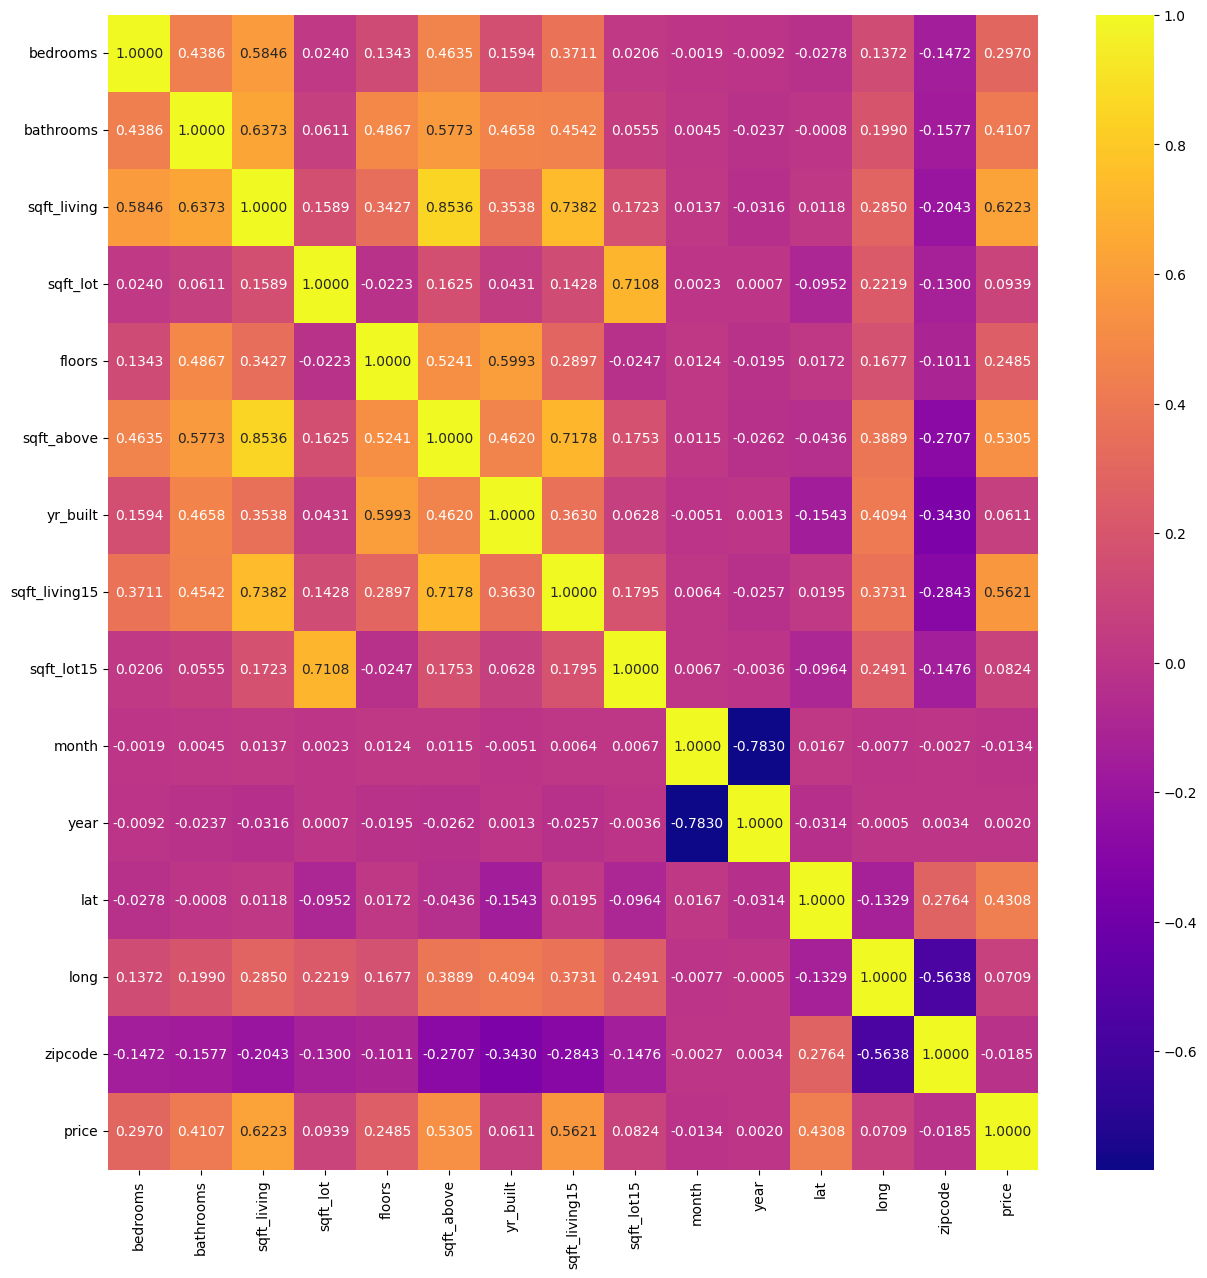

In [59]:
plt.figure(figsize=(15, 15))
sns.heatmap(data1.corr(method="pearson"), annot=True, cmap='plasma', fmt='.4f')

In [60]:
data2 = pd.concat([ordinal_data, label], axis=1)


<Axes: >

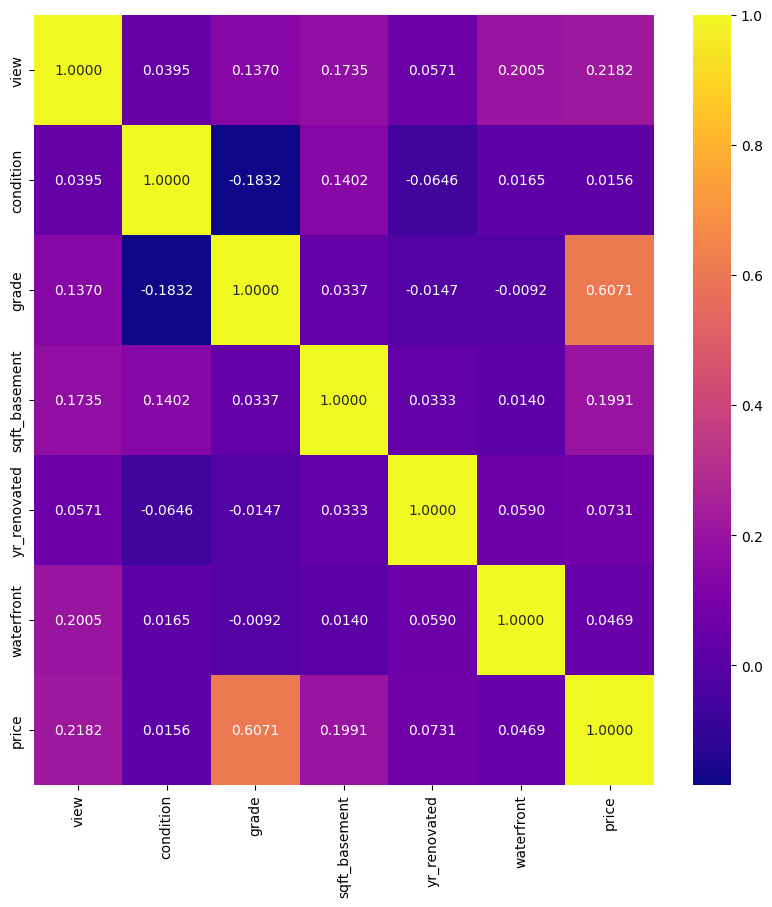

In [61]:
plt.figure(figsize=(10, 10))
sns.heatmap(data2.corr(method="spearman"), annot=True, cmap='plasma', fmt='.4f')


<Axes: >

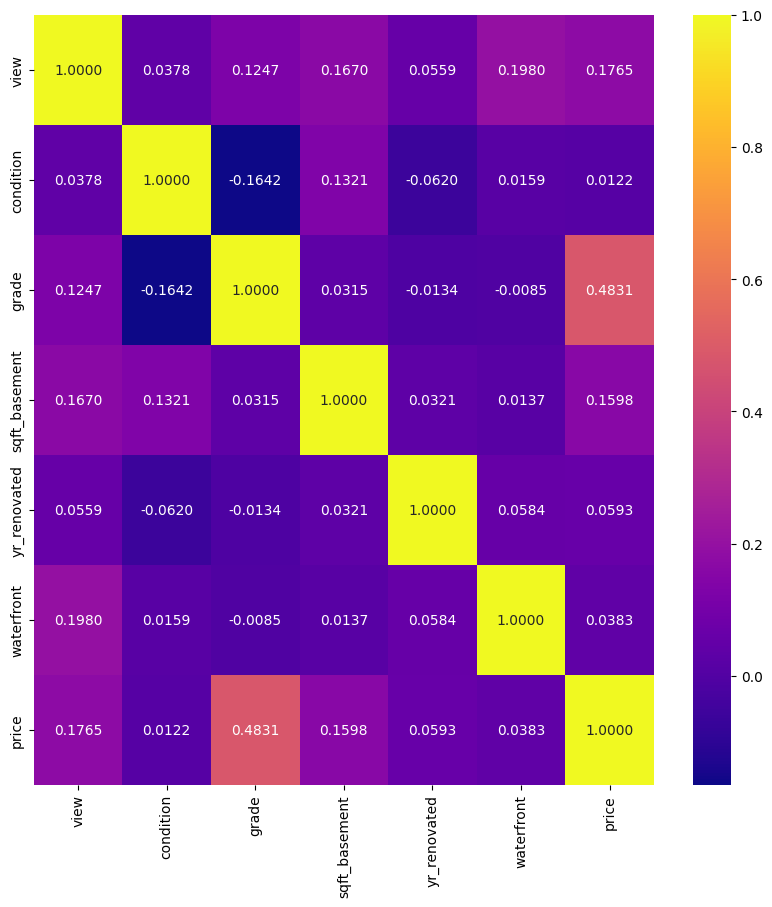

In [62]:
plt.figure(figsize=(10, 10))
sns.heatmap(data2.corr(method="kendall"), annot=True, cmap='plasma', fmt='.4f')


## Visualize the price distribution

In [63]:
import pandas as pd
from shapely.geometry import Point
import geopandas as gpd

<Axes: xlabel='long', ylabel='lat'>

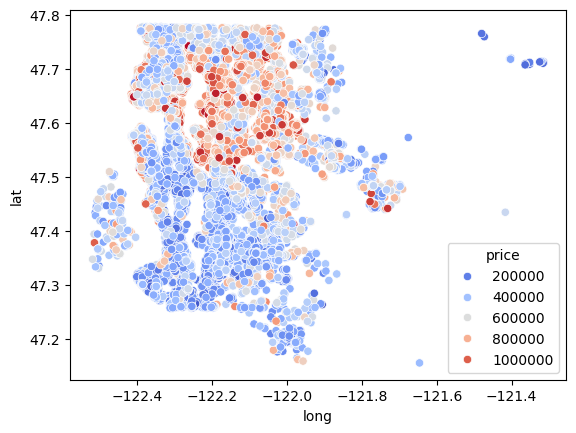

In [64]:
sns.scatterplot(x="long", y="lat", hue="price", data=df, palette='coolwarm' )

In [65]:
shapefile = gpd.read_file('../Dataset/King County/Courts/King_County_District_Courts___juddst_area.shp')

<Axes: >

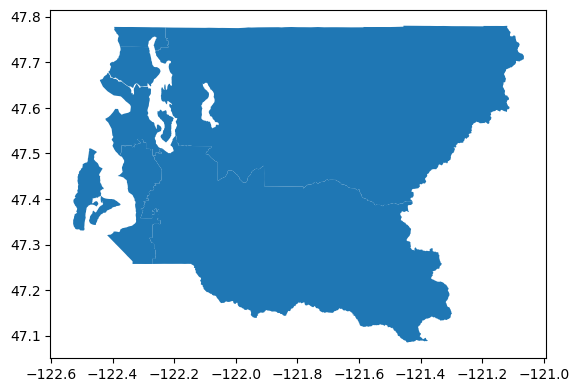

In [66]:
shapefile.plot()

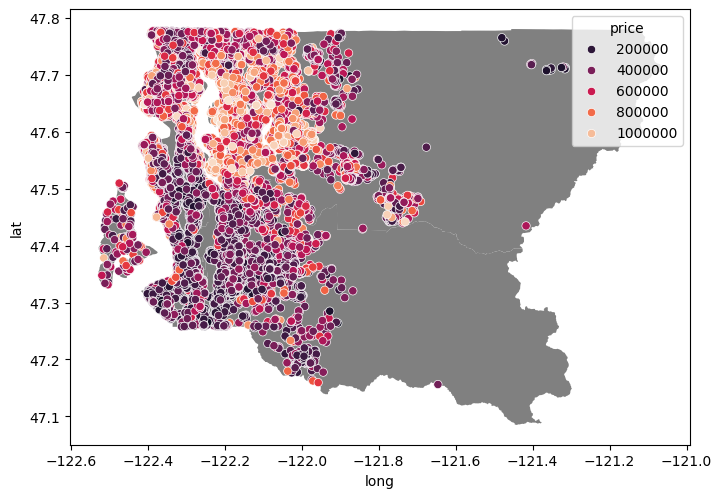

In [67]:
fig, ax = plt.subplots(figsize=(8,8))
shapefile.plot(ax=ax, color='grey')

sns.scatterplot(x="long", y="lat", hue="price", data=df, palette='rocket', ax=ax)

plt.show()

# PCA & MODEL

### Model tanpa PCA

In [145]:
from sklearn.model_selection import train_test_split

X = data_scaled.drop('price', axis=1)
y = data_scaled['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((16373, 20), (4094, 20), (16373,), (4094,))

In [146]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

model = RandomForestRegressor()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print('MSE:', mean_squared_error(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))
print('R2:', r2_score(y_test, y_pred))


MSE: 0.13409671957770652
MAE: 0.24947334216586817
R2: 0.8601959934313682


## Cek semua data di pca untuk di lihat corelasinya

In [147]:
from sklearn.decomposition import PCA

pca = PCA(n_components=20, random_state=0)
pca.fit(data_scaled)
pca_data = pca.transform(data_scaled)
pca_data.shape


(20467, 20)

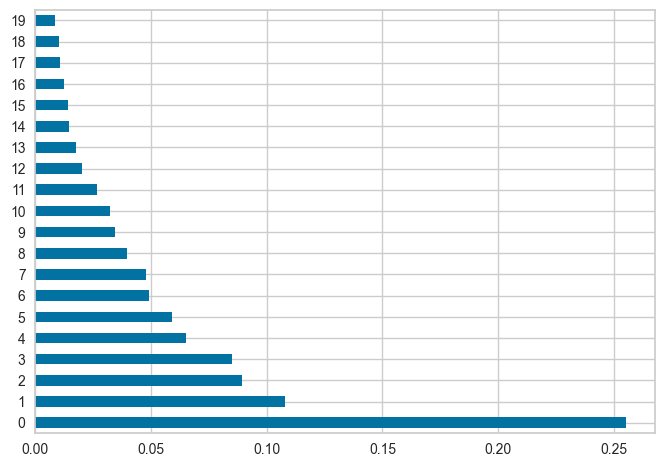

In [148]:
# for i, explained_variance in enumerate(pca.explained_variance_ratio_):
#     print(f'PCA {data_scaled.columns[i]}: {explained_variance}')
explained_variance = pd.Series(pca.explained_variance_ratio_)
explained_variance.nlargest(25).plot(kind='barh')
plt.show()

In [149]:
# random forest
from sklearn.metrics import r2_score

X = data_scaled.drop('price', axis=1)
y = data_scaled['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model = RandomForestRegressor()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
print(r2)



0.8644294999065094


In [150]:
# Ambil 10 terbesar buat di PCA
pca = PCA(n_components=10, random_state=0)
pca.fit(data_scaled.drop('price', axis=1))
pca_data = pca.transform(data_scaled.drop('price', axis=1))
pca_data.shape

In [151]:
pca_data = pd.DataFrame(pca_data)
pca_data.head()

,0,1,2,3,4,5,6,7,8,9
0,-2.350265,-0.001252,-0.375879,-1.318187,0.742445,0.361152,-0.162375,0.316452,0.384645,-0.424621
1,-0.062341,-2.351147,-0.273927,-1.464139,1.873044,1.333166,4.345689,0.241061,-0.572376,0.442598
2,-2.338997,1.392612,-0.150961,1.756123,0.131996,0.426448,-0.074862,-1.671794,-1.517161,-0.282727
3,-1.126560,-2.252442,0.529477,-1.315729,-1.367303,-0.146134,-0.403081,1.093537,1.769309,0.940404
4,0.221040,1.311496,-0.700692,1.786417,-0.035961,0.203135,-0.044171,-0.525450,-0.823492,0.196094


In [152]:
data_scaled['price'].head()

0   -1.224213
1    0.292828
2   -1.425301
3    0.609578
4    0.158449
Name: price, dtype: float64

In [153]:
# random forest but with pca data

X = pca_data
y = data_scaled['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model = RandomForestRegressor()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
rf_score = model.score(X_train, y_train)
rf_score
print("R2 Score: ",r2)
print("RF Score: ",rf_score)
print('MSE:', mean_squared_error(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))

# print(model.feature_importances_)
with open("price_prediction.pkl", "wb") as f:
    pickle.dump(model, f)


R2 Score:  0.7738668088021838
RF Score:  0.9694841122054464
MSE: 0.226867585797343
MAE: 0.3325137643326633


In [154]:
X_test, y_test
# print the first xtest and ytest
print(X_test.iloc[0])
print(y_test.iloc[0])


0    0.506298
1   -1.736218
2   -0.652581
3   -1.218509
4    0.314203
5    0.542383
6   -0.227344
7    1.153604
8    0.513442
9    0.145574
Name: 8698, dtype: float64
0.23043779270468007


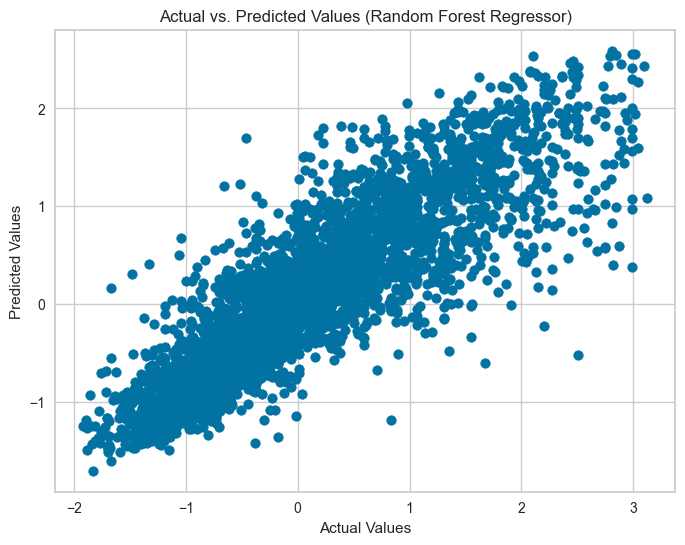

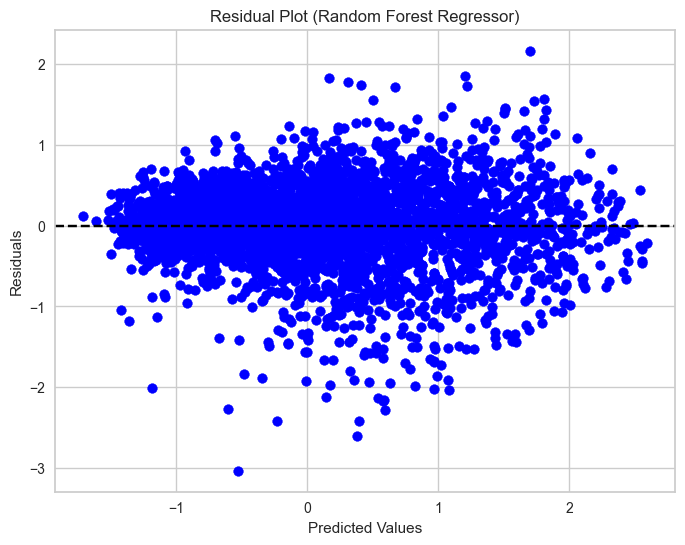

In [155]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values (Random Forest Regressor)')
plt.show()

# Residual plot
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, y_pred - y_test, color='blue')
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot (Random Forest Regressor)')
plt.show()

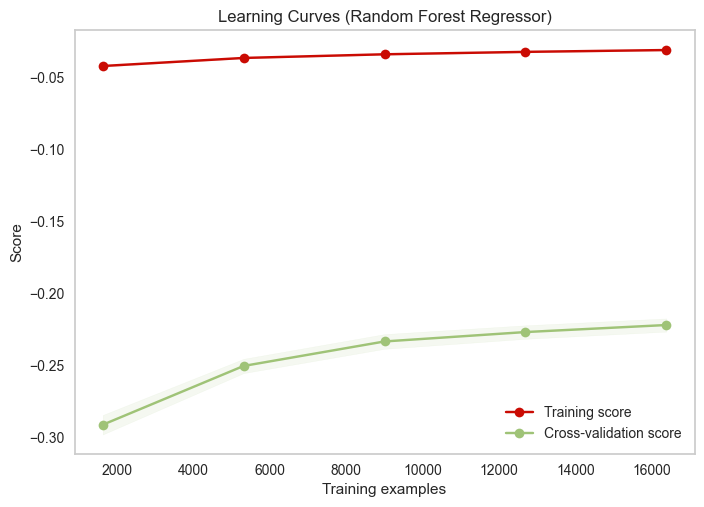

In [156]:
from sklearn.model_selection import learning_curve

# Function to plot learning curves
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='neg_mean_squared_error')
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

title = "Learning Curves (Random Forest Regressor)"
plot_learning_curve(model, title, X, y, cv=5, n_jobs=-1)

plt.show()

In [157]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, cv=5, scoring='r2')
print(scores)
print(scores.mean())


[0.77583456 0.77661074 0.77488732 0.78253359 0.77853632]
0.7776805043456656


n_components: 5, R-squared: 0.553855635411054, Elapsed time: 7.85 seconds
n_components: 6, R-squared: 0.6868810956306418, Elapsed time: 9.07 seconds
n_components: 7, R-squared: 0.6963253521566267, Elapsed time: 10.64 seconds
n_components: 8, R-squared: 0.753599259907594, Elapsed time: 11.51 seconds
n_components: 9, R-squared: 0.761593531982818, Elapsed time: 12.68 seconds
n_components: 10, R-squared: 0.7752363248195968, Elapsed time: 14.01 seconds
n_components: 11, R-squared: 0.7722343094517802, Elapsed time: 15.06 seconds
n_components: 12, R-squared: 0.7785058215756566, Elapsed time: 16.14 seconds
n_components: 13, R-squared: 0.788457927490496, Elapsed time: 17.45 seconds
n_components: 14, R-squared: 0.790394301936328, Elapsed time: 18.62 seconds
n_components: 15, R-squared: 0.7888343712686289, Elapsed time: 19.59 seconds
n_components: 16, R-squared: 0.7889166426887697, Elapsed time: 20.81 seconds
n_components: 17, R-squared: 0.7922236525662784, Elapsed time: 21.49 seconds
n_component

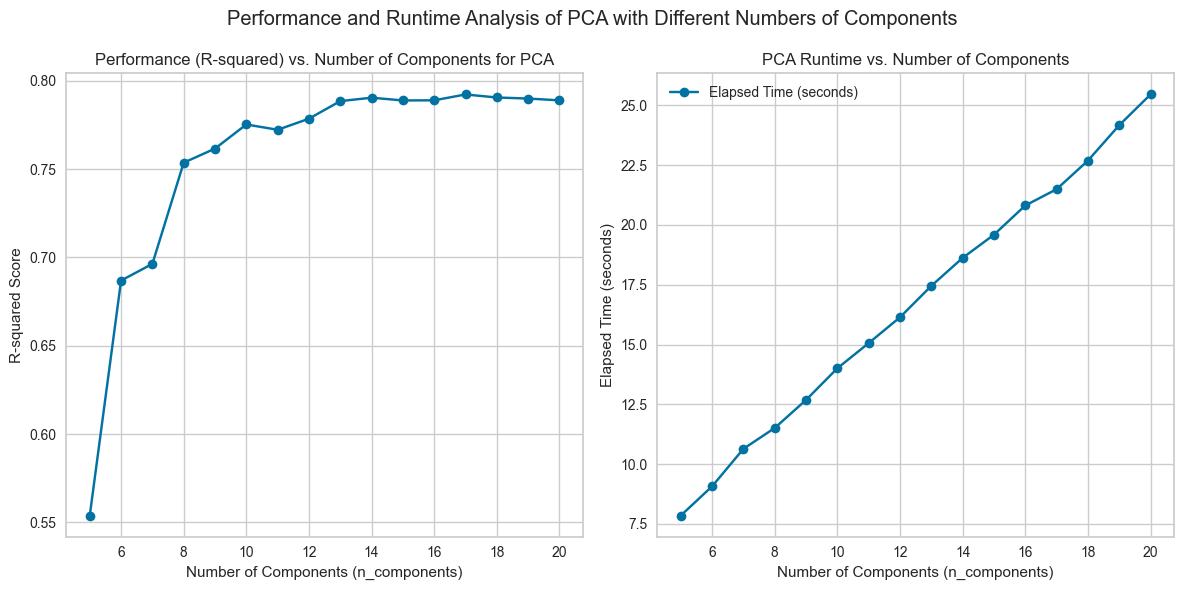

In [158]:
import time
# List to store R-squared scores and elapsed times
r2_scores = []
elapsed_times = []

# Range of n_components
n_components_range = range(5, 21)  # From 5 to 20

for n_components in n_components_range:
    start_time = time.time()

    pca = PCA(n_components=n_components, random_state=0)
    pca.fit(data_scaled.drop('price', axis=1))
    pca_data = pca.transform(data_scaled.drop('price', axis=1))

    X = pca_data
    y = data_scaled['price']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

    model = RandomForestRegressor()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    current_r2_score = r2_score(y_test, y_pred)

    end_time = time.time()
    current_elapsed_time = end_time - start_time

    print(f"n_components: {n_components}, R-squared: {current_r2_score}, Elapsed time: {current_elapsed_time:.2f} seconds")
    r2_scores.append(current_r2_score)
    elapsed_times.append(current_elapsed_time)

# Create the plots
plt.figure(figsize=(12, 6))

# Plot 1: R-squared vs. n_components
plt.subplot(121)  # Create the first subplot on the left
plt.plot(n_components_range, r2_scores, marker='o', linestyle='-', label='R-squared Score')
plt.xlabel('Number of Components (n_components)')
plt.ylabel('R-squared Score')
plt.title('Performance (R-squared) vs. Number of Components for PCA')
plt.grid(True)

# Plot 2: Runtime vs. n_components
plt.subplot(122)  # Create the second subplot on the right  
plt.plot(n_components_range, elapsed_times, marker='o', linestyle='-', label='Elapsed Time (seconds)')
plt.xlabel('Number of Components (n_components)')
plt.ylabel('Elapsed Time (seconds)')
plt.title('PCA Runtime vs. Number of Components')
plt.grid(True)

# Add labels and title for the entire figure
plt.suptitle('Performance and Runtime Analysis of PCA with Different Numbers of Components')
plt.legend() 
plt.tight_layout() 
plt.show()


In [161]:
# Ambil 8 terbesar buat di PCA
pca = PCA(n_components=10, random_state=0)
pca.fit(data_scaled.drop('price', axis=1))
pca_data = pca.transform(data_scaled.drop('price', axis=1))
pca_data.shape

(20467, 10)

In [160]:
from pycaret.regression import *

exp1 = setup(data = pca_data, target = data_scaled['price'])

,Description,Value
0,Session id,3050
1,Target,price
2,Target type,Regression
3,Original data shape,"(20467, 11)"
4,Transformed data shape,"(20467, 11)"
5,Transformed train set shape,"(14326, 11)"
6,Transformed test set shape,"(6141, 11)"
7,Numeric features,10
8,Preprocess,True
9,Imputation type,simple


In [56]:
model = compare_models()

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,20:19:07
Status,. . . . . . . . . . . . . . . . . .,Loading Estimator
Estimator,. . . . . . . . . . . . . . . . . .,Linear Regression


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,0.3301,0.2184,0.4673,0.7801,0.2291,2.5260,0.4370
rf,Random Forest Regressor,0.3344,0.2243,0.4735,0.7742,0.2319,2.4935,1.2080
lightgbm,Light Gradient Boosting Machine,0.3435,0.2271,0.4765,0.7712,0.2366,2.7472,0.1350
xgboost,Extreme Gradient Boosting,0.3465,0.2343,0.4839,0.7639,0.2377,3.1868,0.0880
knn,K Neighbors Regressor,0.3590,0.2539,0.5037,0.7442,0.2448,3.1292,0.0210
gbr,Gradient Boosting Regressor,0.3892,0.2785,0.5277,0.7196,0.2629,2.6881,0.5590
lar,Least Angle Regression,0.4411,0.3372,0.5807,0.6605,0.2844,2.8631,0.0080
br,Bayesian Ridge,0.4411,0.3372,0.5807,0.6605,0.2845,2.8621,0.0080
ridge,Ridge Regression,0.4411,0.3372,0.5807,0.6605,0.2845,2.8630,0.0080
lr,Linear Regression,0.4411,0.3372,0.5807,0.6605,0.2844,2.8631,0.6250


# Mencoba Hyperparameter Tuning dengan GridSearchCV
- di X = pca_data
- di X = data bukan pca


In [67]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 10, 20],        # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],    # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4]       # Minimum number of samples required at each leaf node
}

X = pca_data
y = data_scaled['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model = RandomForestRegressor()

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')

# Perform the grid search on your data
grid_search.fit(X_train, y_train)  # X_train_pca should be your PCA-transformed training data

# Print the best parameters found by grid search
print("Best Parameters:", grid_search.best_params_)

# Print the best cross-validation score found by grid search
print("Best Cross-Validation Score:", grid_search.best_score_)



Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Cross-Validation Score: nan


In [162]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X = pca_data
y = data_scaled['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model = RandomForestRegressor(min_samples_leaf=1, min_samples_split=2, n_estimators=100, random_state=0)
model.fit(X_train, y_train)

predict = model.predict(X_test)
r2_score(y_test, predict)



0.7747907193366136

Dapat diambil kesimpulan bahwa dengan menggunakan PCA, akurasi yang didapatkan malah menurun. sehingga tidak relevan untuk digunakan.
##### belom boleh diambil kesimpulan begini

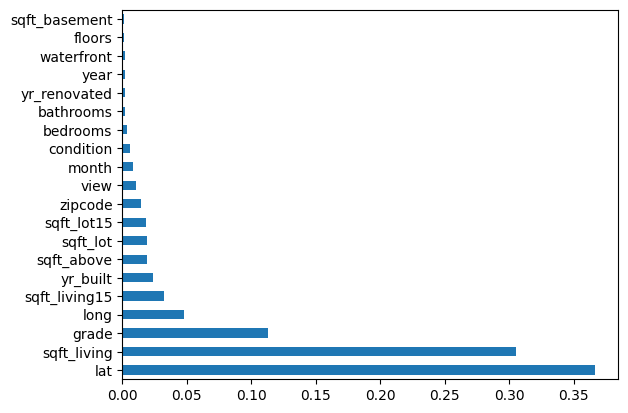

In [ ]:
# Ini buat liat Feature_Correlation dari RandomForest
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

X = data_scaled.drop('price', axis=1)
y = data_scaled['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model = RandomForestRegressor()
model.fit(X_train, y_train)

feat_importances = pd.Series(model.feature_importances_, index = X.columns)
feat_importances.nlargest(22).plot(kind='barh')
plt.show()


In [57]:
# Berdasarkan feature correlation diatas, kita bisa mengambil 10 feature terbaik

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X = data_scaled[['sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'bathrooms', 'lat', 'view', 'sqft_basement', 'waterfront', 'yr_renovated']]
y = data_scaled['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model = RandomForestRegressor()
model.fit(X_train, y_train)

predict = model.predict(X_test)
r2_score(y_test, predict)





0.7917534604934912

Index(['lat', 'sqft_living', 'grade', 'long', 'sqft_living15', 'sqft_lot',
       'yr_built', 'sqft_above', 'sqft_lot15', 'zipcode'],
      dtype='object')
0.8497157734436502
Index(['lat', 'sqft_living', 'grade', 'long', 'sqft_living15', 'sqft_lot',
       'yr_built', 'sqft_above', 'sqft_lot15', 'zipcode', 'view'],
      dtype='object')
0.8544056154056662
Index(['lat', 'sqft_living', 'grade', 'long', 'sqft_living15', 'sqft_lot',
       'yr_built', 'sqft_above', 'sqft_lot15', 'zipcode', 'view', 'month'],
      dtype='object')
0.8567536373313613
Index(['lat', 'sqft_living', 'grade', 'long', 'sqft_living15', 'sqft_lot',
       'yr_built', 'sqft_above', 'sqft_lot15', 'zipcode', 'view', 'month',
       'condition'],
      dtype='object')
0.8588924107128345
Index(['lat', 'sqft_living', 'grade', 'long', 'sqft_living15', 'sqft_lot',
       'yr_built', 'sqft_above', 'sqft_lot15', 'zipcode', 'view', 'month',
       'condition', 'bedrooms'],
      dtype='object')
0.859089200423909
Index(['lat', '

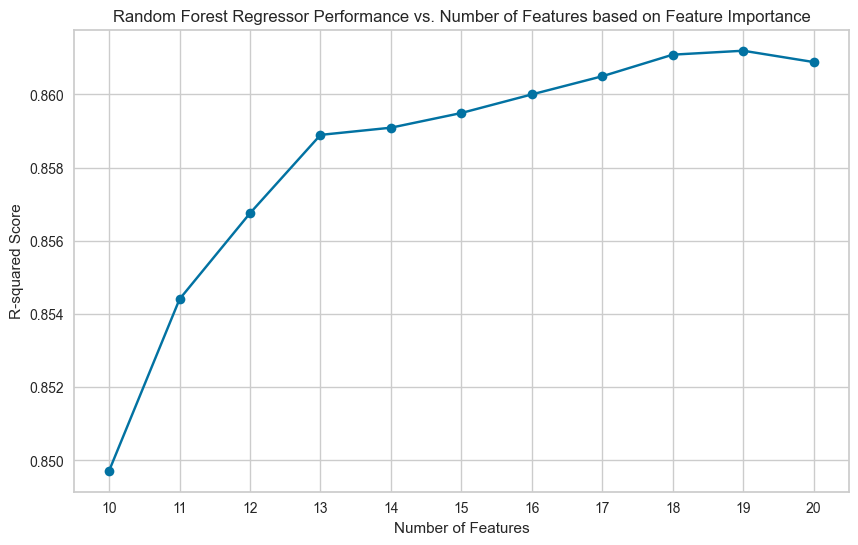

In [66]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score


X = data_scaled.drop('price', axis=1)
y = data_scaled['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)
feature_importance = rf_regressor.feature_importances_


sorted_indices = np.argsort(feature_importance)[::-1]

# Train Random Forest Regressor with varying number of features based on importance
r2_scores = []
num_features = list(range(10, X_train.shape[1]+1))  # From 10 to all features

for n in num_features:

    print(X_train.iloc[:, sorted_indices[:n]].columns)
    rf_regressor.fit(X_train.iloc[:, sorted_indices[:n]], y_train)
    

    y_pred = rf_regressor.predict(X_test.iloc[:, sorted_indices[:n]])
    

    r2 = r2_score(y_test, y_pred)
    print(r2)
    r2_scores.append(r2)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(num_features, r2_scores, marker='o')
plt.xlabel('Number of Features')
plt.ylabel('R-squared Score')
plt.title('Random Forest Regressor Performance vs. Number of Features based on Feature Importance')
plt.xticks(num_features)
plt.grid(True)
plt.show()


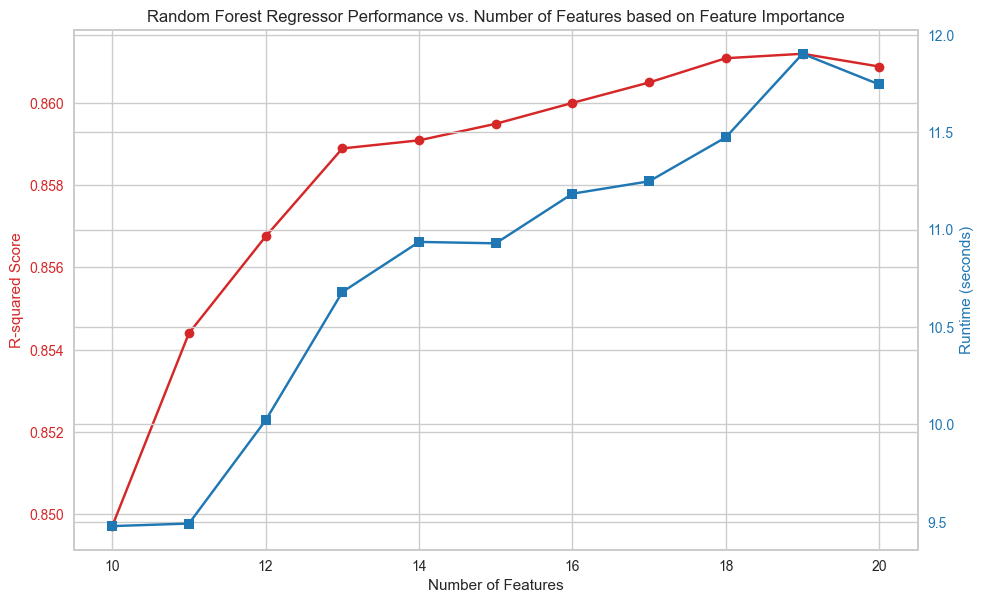

In [163]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import time

X = data_scaled.drop('price', axis=1)
y = data_scaled['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)
feature_importance = rf_regressor.feature_importances_

sorted_indices = np.argsort(feature_importance)[::-1]

# Train Random Forest Regressor with varying number of features based on importance
r2_scores = []
runtimes = []
num_features = list(range(10, X_train.shape[1] + 1))  # From 10 to all features

for n in num_features:
    start_time = time.time()
    rf_regressor.fit(X_train.iloc[:, sorted_indices[:n]], y_train)
    y_pred = rf_regressor.predict(X_test.iloc[:, sorted_indices[:n]])
    end_time = time.time()
    
    runtime = end_time - start_time
    runtimes.append(runtime)

    r2 = r2_score(y_test, y_pred)
    r2_scores.append(r2)

# Plot the results
fig, ax1 = plt.subplots(figsize=(10, 6))

color = 'tab:red'
ax1.set_xlabel('Number of Features')
ax1.set_ylabel('R-squared Score', color=color)
ax1.plot(num_features, r2_scores, marker='o', color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('Runtime (seconds)', color=color)  
ax2.plot(num_features, runtimes, marker='s', color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  
plt.title('Random Forest Regressor Performance vs. Number of Features based on Feature Importance')
plt.grid(True)
plt.show()

Index(['lat', 'sqft_living', 'grade', 'long', 'sqft_living15', 'sqft_lot',
       'yr_built', 'sqft_above', 'sqft_lot15', 'zipcode', 'view', 'month',
       'condition'],
      dtype='object')
0.8588924107128345

13 Features.

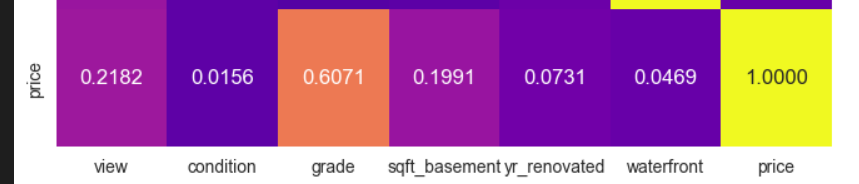
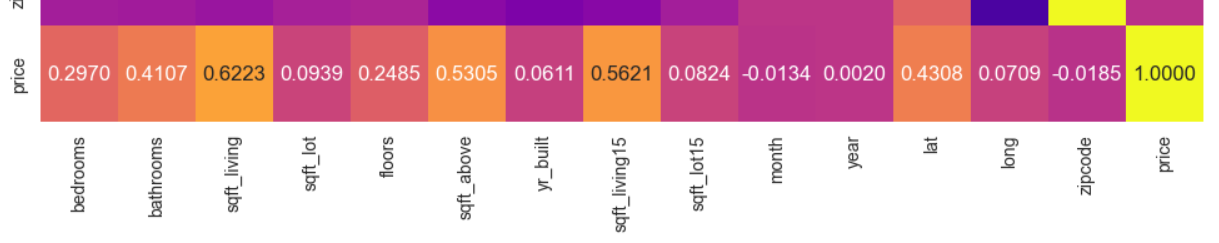

In [164]:
sorted_features_numeric = ['sqft_living','sqft_living15','sqft_above','lat','bathrooms','bedrooms','floors','sqft_lot','sqft_lot15','long','yr_built','year','month','zipcode']
sorted_features_ordinal = ['grade', 'view', 'sqft_basement', 'yr_renovated', 'waterfront', 'condition']

sorted_features = ['sqft_living','grade','sqft_living15','sqft_above','lat','bathrooms','bedrooms','floors','view','sqft_basement','sqft_lot','sqft_lot15','yr_renovated','long','yr_built','waterfront','condition','year','month','zipcode']

0.36298531384610055
0.41823938618513723
0.33932421369292043
0.40685337599172966
0.7692898182528709
0.7736207506657227
0.7754856760884912
0.7791098918212658
0.791859129515369
0.791365582969711
0.8114325109621044
0.8172255600222678
0.8180282138127928
0.8522481659668326
0.8539769663546111
0.8544856144316819
0.8567766440678626
0.8589374243017163
0.8597470071534172
0.8605079412227392


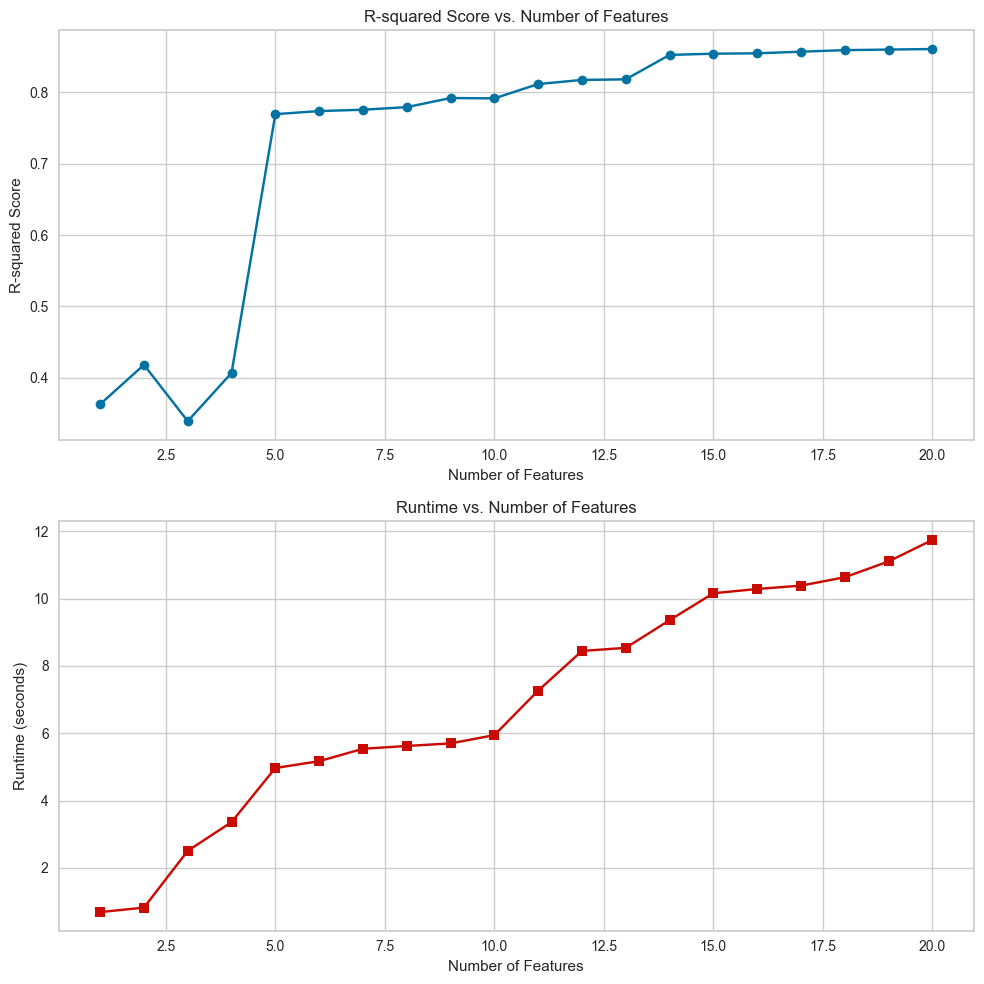

In [165]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import time

# Assuming 'data_scaled' contains your scaled dataset

X = data_scaled[sorted_features]
y = data_scaled['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

r2_scores = []
runtimes = []

# Iterate through different number of features
for i in range(1, len(sorted_features) + 1):
    start_time = time.time()
    
    # Train model with the first i features
    rf_regressor.fit(X_train.iloc[:, :i], y_train)
    y_pred = rf_regressor.predict(X_test.iloc[:, :i])

    end_time = time.time()

    runtime = end_time - start_time
    runtimes.append(runtime)
    
    r2 = r2_score(y_test, y_pred)
    print(i, r2)
    r2_scores.append(r2)

# Plotting
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))

# R-squared score subplot
ax1.plot(range(1, len(sorted_features) + 1), r2_scores, marker='o', color='b')
ax1.set_title('R-squared Score vs. Number of Features')
ax1.set_xlabel('Number of Features')
ax1.set_ylabel('R-squared Score')
ax1.grid(True)

# Runtime subplot
ax2.plot(range(1, len(sorted_features) + 1), runtimes, marker='s', color='r')
ax2.set_title('Runtime vs. Number of Features')
ax2.set_xlabel('Number of Features')
ax2.set_ylabel('Runtime (seconds)')
ax2.grid(True)

plt.tight_layout()
plt.show()

In [168]:
features = ['sqft_living','grade','sqft_living15','sqft_above','lat','bathrooms','bedrooms','floors','view','sqft_basement','sqft_lot','sqft_lot15','yr_renovated','long']

In [173]:
from pycaret.regression import *

exp1 = setup(data = data_scaled[features], target = data_scaled['price'])

,Description,Value
0,Session id,8780
1,Target,price
2,Target type,Regression
3,Original data shape,"(20467, 15)"
4,Transformed data shape,"(20467, 15)"
5,Transformed train set shape,"(14326, 15)"
6,Transformed test set shape,"(6141, 15)"
7,Numeric features,14
8,Preprocess,True
9,Imputation type,simple


In [174]:
model = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.2581,0.1326,0.3639,0.8682,0.1832,2.9242,0.1650
xgboost,Extreme Gradient Boosting,0.2667,0.1424,0.3772,0.8584,0.1895,3.2810,0.0670
rf,Random Forest Regressor,0.2638,0.1436,0.3787,0.8573,0.1876,2.9015,0.8110
et,Extra Trees Regressor,0.2699,0.1492,0.3860,0.8518,0.1916,2.2638,0.4270
gbr,Gradient Boosting Regressor,0.2958,0.1710,0.4133,0.8301,0.2051,3.4387,0.2800
knn,K Neighbors Regressor,0.3455,0.2423,0.4922,0.7591,0.2357,3.2568,0.0420
dt,Decision Tree Regressor,0.3765,0.2898,0.5381,0.7116,0.2494,5.9992,0.0240
ridge,Ridge Regression,0.4474,0.3474,0.5892,0.6548,0.2902,3.1461,0.0120
br,Bayesian Ridge,0.4474,0.3474,0.5892,0.6548,0.2902,3.1453,0.0090
lr,Linear Regression,0.4474,0.3474,0.5892,0.6548,0.2902,3.1462,0.8610


In [72]:

import lightgbm as lgb

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

X = data_scaled[features]
y = data_scaled['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = lgb.LGBMRegressor()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)

with open("model.pkl", "wb") as f:
    pickle.dump(model, f)
    
print(r2)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000603 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1890
[LightGBM] [Info] Number of data points in the train set: 16373, number of used features: 14
[LightGBM] [Info] Start training from score 0.003709
0.8594425690363198
